## Secondary Study to Determine the Park Density and Air Quality in Los Angeles

### Air quality data
### Set-up Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)


### Set-up Multi-API Call
* This data set has 2 years available, so I will create two API calls and add all the date into a single datafram

In [2]:
# The data has 2 years
years = [2014, 2017]
# The endpoint will require I specify the year
url =  "https://usc.data.socrata.com/resource/bhyw-mxf5.json?$where=year="

### Save JSON data into Lists (pre-dataframe step)

In [3]:
# Initialize a list that will eventually be used for form the columns in dataframe.
count = []
dataset = []
date = []
geoid = []
location = []
lat = []
lng = []
neighborhood = []
policy_area = []
row_id = []
tract = []
tract_number = []
variable = []
year = []


for yr in years:
    query_url = f"{url}{yr}"
    response = requests.get(query_url)
    response_json = response.json()
    
    for key in range(len(response_json)):
        count.append(response_json[key]['count'])
        dataset.append(response_json[key]['dataset'])
        date.append(response_json[key]['date'])
        geoid.append(response_json[key]['geoid'])
        location.append(response_json[key]['location'])
        neighborhood.append(response_json[key]['neighborhood'])
        policy_area.append(response_json[key]['policy_area'])
        row_id.append(response_json[key]['row_id'])
        tract.append(response_json[key]['tract'])
        tract_number.append(response_json[key]['tract_number'])
        variable.append(response_json[key]['variable'])
        year.append(response_json[key]['year'])




### Split location column into lat and lng columns
* Having lat and logitudinal data will be useful for map visualization

In [4]:
# Split the location list into two lists, one for lat and one for long data
for i in range(len(location)):
    first = location[i].index(location[i][1])
    last = location[i].index(location[i][-1])
    unpacked = location[i][first:last]
    split_location = unpacked.split(",")
    lat.append(split_location[0])
    lng.append(split_location[1])


### Create Dataframe
* Create a dictionary that contains the list of data from the JSON data, and a label
* Pass the dict object into pd.DataFrame, and create a pandas object

In [5]:
dict = {"year" : year,
        "count" : count,
       "dataset" : dataset,
       "date" :  date,
       "geoid" : geoid,
       "location" : location,
        "lat" : lat,
        "lng" : lng,
        "neighborhood" : neighborhood,
        "policy area" : policy_area,
        "row id": row_id,
        "tract" : tract,
        "tract number" : tract_number,
        "variable" : variable,
       }

df = pd.DataFrame(data = dict)
df

,year,count,dataset,date,geoid,location,lat,lng,neighborhood,policy area,row id,tract,tract number,variable
0,2014,11.04010029,Air Quality,2014-01-01T00:00:00.000,1400000US06037101110,"(34.2595555, -118.293602)",34.2595555,-118.293602,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",101110,PM2.5 Concentration
1,2014,10.95372448,Air Quality,2014-01-01T00:00:00.000,1400000US06037101122,"(34.267357, -118.29024)",34.267357,-118.29024,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",101122,PM2.5 Concentration
2,2014,11.11423953,Air Quality,2014-01-01T00:00:00.000,1400000US06037101210,"(34.251998, -118.2926875)",34.251998,-118.2926875,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",101210,PM2.5 Concentration
3,2014,11.14308442,Air Quality,2014-01-01T00:00:00.000,1400000US06037101220,"(34.2511895, -118.281014)",34.2511895,-118.281014,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",101220,PM2.5 Concentration
4,2014,11.18952698,Air Quality,2014-01-01T00:00:00.000,1400000US06037101300,"(34.2455945, -118.271731)",34.2455945,-118.271731,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101300,"Census Tract 1013, Los Angeles County, California",101300,PM2.5 Concentration
5,2014,11.21675181,Air Quality,2014-01-01T00:00:00.000,1400000US06037101400,"(34.244255, -118.296428)",34.244255,-118.296428,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101400,"Census Tract 1014, Los Angeles County, California",101400,PM2.5 Concentration
6,2014,11.28482481,Air Quality,2014-01-01T00:00:00.000,1400000US06037102103,"(34.224155, -118.354339)",34.224155,-118.354339,Shadow Hills,Environment,PM2.5_Concentration_2014_1400000US06037102103,"Census Tract 1021.03, Los Angeles County, Cali...",102103,PM2.5 Concentration
7,2014,11.39135727,Air Quality,2014-01-01T00:00:00.000,1400000US06037102104,"(34.216189, -118.3456235)",34.216189,-118.3456235,Shadow Hills,Environment,PM2.5_Concentration_2014_1400000US06037102104,"Census Tract 1021.04, Los Angeles County, Cali...",102104,PM2.5 Concentration
8,2014,11.44396506,Air Quality,2014-01-01T00:00:00.000,1400000US06037102105,"(34.210852, -118.3480495)",34.210852,-118.3480495,Sun Valley,Environment,PM2.5_Concentration_2014_1400000US06037102105,"Census Tract 1021.05, Los Angeles County, Cali...",102105,PM2.5 Concentration
9,2014,11.16243397,Air Quality,2014-01-01T00:00:00.000,1400000US06037102107,"(34.2412955, -118.3292705)",34.2412955,-118.3292705,Shadow Hills,Environment,PM2.5_Concentration_2014_1400000US06037102107,"Census Tract 1021.07, Los Angeles County, Cali...",102107,PM2.5 Concentration


### Format and Clean Data for Further Analysis
* Convert columns to appropriate data types
* For data imported as strings, remove white space, and misc characters.


In [6]:
# Convert the following column from string to floats. 
# The count column contains pollution data.
# Location, lat and lng to be used for mapping and other analysis

df["count"] = pd.to_numeric(df["count"])
df["lat"] = pd.to_numeric(df["lat"])
df["lng"] = pd.to_numeric(df["lng"])

df.head()

,year,count,dataset,date,geoid,location,lat,lng,neighborhood,policy area,row id,tract,tract number,variable
0,2014,11.040100,Air Quality,2014-01-01T00:00:00.000,1400000US06037101110,"(34.2595555, -118.293602)",34.259555,-118.293602,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",101110,PM2.5 Concentration
1,2014,10.953724,Air Quality,2014-01-01T00:00:00.000,1400000US06037101122,"(34.267357, -118.29024)",34.267357,-118.290240,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",101122,PM2.5 Concentration
2,2014,11.114240,Air Quality,2014-01-01T00:00:00.000,1400000US06037101210,"(34.251998, -118.2926875)",34.251998,-118.292687,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",101210,PM2.5 Concentration
3,2014,11.143084,Air Quality,2014-01-01T00:00:00.000,1400000US06037101220,"(34.2511895, -118.281014)",34.251190,-118.281014,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",101220,PM2.5 Concentration
4,2014,11.189527,Air Quality,2014-01-01T00:00:00.000,1400000US06037101300,"(34.2455945, -118.271731)",34.245595,-118.271731,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101300,"Census Tract 1013, Los Angeles County, California",101300,PM2.5 Concentration


### Visualize Data using Gmaps

In [7]:
# Store latitude and longitude in locations
locations = df[["lat", "lng"]]

# Plot Heatmap
fig = gmaps.figure()

symbol_layer = gmaps.symbol_layer(locations, fill_color='red', stroke_color='black', scale=2)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

##  Aggregate Data by Year and then remove multilevel index

In [8]:
# Aggregate by neighborhood and generate columns for lat, long, and pollution counts.
aggregated_data = df.groupby("neighborhood").agg(["min", "max", "mean"])

air_agg_level_0 = aggregated_data.columns.get_level_values(0)
air_agg_level_1 = aggregated_data.columns.get_level_values(1)

# Remove multilevel index and assign to same df
aggregated_data.columns = air_agg_level_0 + '_' + air_agg_level_1
aggregated_data = aggregated_data[["count_mean", "lat_min", "lng_min"]]
pollution_mean = aggregated_data["count_mean"]
neighborhood_lat = aggregated_data["lat_min"]
neighborhood_lng = aggregated_data["lng_min"]

### Determine the relationship between latitude and pollution counts

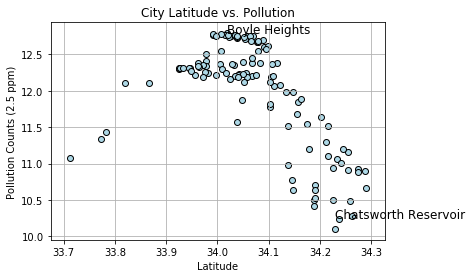

In [9]:
# Plot the pollution counts by neighborhood (via their lat) and visualize in gmaps
x = neighborhood_lat
y = pollution_mean
plt.scatter(x, y, c = 'lightblue', edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Pollution Counts (2.5 ppm)")
plt.title(f"City Latitude vs. Pollution")
plt.grid(True)

# Label the neighborhood with the heighest and lowest counts
# X,Y Coordinates for BH and Chatsworth reservoice
boyle_heights_lat = 34.018117
boyle_heights_cnt = 12.791653
chatsworth_res_lat = 34.228206
chatsworth_res_cnt = 10.245630
plt.text(x = boyle_heights_lat, y = boyle_heights_cnt, s = "Boyle Heights", fontsize = 12)
plt.text(chatsworth_res_lat, chatsworth_res_cnt, s = "Chatsworth Reservoir", fontsize = 12)
plt.savefig('lat_vs_pollution.png')


### Determine the Covariance
* Use numpy np.cov() to evaluate
* a) how the temperature and latitude vary together
* b) determine the directionality of any association
* Statistical Principal:
* The covariance is used to determine the direction of a linear relationship between two variables as follows:
* If both variables tend to increase or decrease together, the coefficient is positive.
* If one variable tends to increase as the other decreases, the coefficient is negative.

In [10]:
x = neighborhood_lat
y = pollution_mean

np.cov(x,y)

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x, y)
covariance_matrix

# Extract covariance of latitude and Max Temperature
pol_lav_covariance = covariance_matrix[0,1]
pol_lav_covariance

if (pol_lav_covariance < 0):
    print(f"The covariance for latitude and temperature is {round(pol_lav_covariance,4)}, and is negative. \nThis states that as one variable increases, the other decreases.")
else:
    print(f"The covariance for latitude and temperature is {round(pol_lav_covariance,4)}, is positive. \nThis states that these variable tend to either increase or decrease together.")

The covariance for latitude and temperature is -0.0482, and is negative. 
This states that as one variable increases, the other decreases.


### Determine the Pearson Coefficient
* Use numpy np.corrcoef() to evaluate 
* a) how the temperature and latitude vary together
* b) Examine the linear relationship between these two variables 

* Statistical Principal: 
* Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance.
* The strenght of the association depends on how close the value approaches -1 or 1.
* The directionality of the association depends on whether it is positive or negative.

In [11]:
# Function that Computes the Pearson correlation coefficient between two arrays.
def pearson_r(x, y):

    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(x, y)

# Print the result
print(r)

if (r < 0):
    print(f"Since r = {round(r,4)}, is negative; as one variable increases, the other decreases.")
    if(r <= -0.75):
        print(f"Since r = {round(r,4)} is close to -1; There is a strong inverse relationship between these two variables.")
if (r > 0):
    print(f"Since r = {round(r,4)}, is positive; both variables increase together, or decrease together.")
    if (r >= 0.75):
        print(f"Since r = {round(r,4)} is close to 1; There is a strong positive relationship between these two variables.")
    else:
        print("There is a weak or no association between both variables.")

-0.5914960694899909
Since r = -0.5915, is negative; as one variable increases, the other decreases.


### Visualize 5 neighborhoods with the higest and lowest pollution and plot in gmap

In [12]:
# Top 5 cities with the heighest pollutio using "nlargest"
top_5_pollution = aggregated_data.nlargest(5, "count_mean")
low_5_pollution = aggregated_data.nsmallest(5, "count_mean")

In [13]:

# Further subset the lat and lng for each of these cities and save into a new df
top_5_loc = top_5_pollution[["lat_min", "lng_min"]]
low_5_loc = low_5_pollution[["lat_min", "lng_min"]]

In [14]:
# Store latitude and longitude in locations
top_locations = top_5_loc
low_locations = low_5_loc

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
top_layer = gmaps.heatmap_layer(top_locations)
top_marker_layer = gmaps.marker_layer(top_locations, label='high')

low_layer = gmaps.heatmap_layer(low_locations)
low_marker_layer = gmaps.marker_layer(low_locations, label='low')

# Add layer
fig.add_layer(top_layer)
fig.add_layer(top_marker_layer)
fig.add_layer(low_layer)
fig.add_layer(low_marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Visualize the counts in gmaps to highlight distribution of pollution

In [15]:
# Assign the lat and long variable of the aggregated dataset to the location variable
location = aggregated_data[["lat_min", "lng_min"]]

# Plot Heatmap
locations = location
weights = pollution_mean

fig = gmaps.figure(map_type="SATELLITE")

# # Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights)

# # Add layer
fig.add_layer(heat_layer)

# # Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Park Data

In [16]:
park_url =  "https://usc.data.socrata.com/resource/kp5h-fmqh.json?dataset=Parks Access"

In [17]:
park_count = []
park_dataset = []
park_date = []
park_geoid = []
park_location = []
park_lat = []
park_lng = []
park_neighborhood = []
park_policy_area = []
park_row_id = []
park_tract = []
park_tract_number = []
park_variable = []
park_year = []


query_url_park = f"{park_url}"
response = requests.get(query_url_park)
park_response_json = response.json()
# park_response_json[0:10]

for index in range(len(park_response_json)):
    try:
        park_count.append(park_response_json[index]['count'])
        park_dataset.append(park_response_json[index]['dataset'])
        park_date.append(park_response_json[index]['date'])
        park_geoid.append(park_response_json[index]['geoid'])
        park_location.append(park_response_json[index]['location']['coordinates'])
        park_neighborhood.append(park_response_json[index]['neighborhood'])
        park_policy_area.append(park_response_json[index]['policy_area'])
        park_row_id.append(park_response_json[index]['row_id'])
        park_tract.append(park_response_json[index]['tract'])
        park_tract_number.append(park_response_json[index]['tract_number'])
        park_variable.append(park_response_json[index]['variable'])
        park_year.append(park_response_json[index]['year'])
    except: 
        print(f"this {index} is no good")




this 440 is no good
this 847 is no good


In [18]:
for i in range(len(park_location)):
    park_lat.append(park_location[i][1])
    park_lng.append(park_location[i][0])
    

In [19]:
dict = {"year" : park_year,
        "count" : park_count,
       "dataset" : park_dataset,
        "lat" : park_lat,
        "lng" : park_lng,
       "date" :  park_date,
       "geoid" : park_geoid,
       "location" : park_location,
        "neighborhood" : park_neighborhood,
        "policy area" : park_policy_area,
        "row id": park_row_id,
        "tract" : park_tract,
        "tract number" : park_tract_number,
        "variable" : park_variable,
       }

df_park = pd.DataFrame(data = dict)
df_park

,year,count,dataset,lat,lng,date,geoid,location,neighborhood,policy area,row id,tract,tract number,variable
0,2015,0.2307633501355139,Parks Access,34.049649,-118.381096,2015-01-01T00:00:00.000,1400000US06037217002,"[-118.381096, 34.049649]",Pico-Robertson,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 2170.02, Los Angeles County, Cali...",217002,"Acres of Parks Per 1,000 People"
1,2015,4.212398007039556,Parks Access,34.021380,-118.431080,2015-01-01T00:00:00.000,1400000US06037271600,"[-118.4310805, 34.0213795]",Mar Vista,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 2716, Los Angeles County, California",271600,"Acres of Parks Per 1,000 People"
2,2015,0.6445143626731451,Parks Access,34.269881,-118.455282,2015-01-01T00:00:00.000,1400000US06037109400,"[-118.4552825, 34.269881]",Mission Hills,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 1094, Los Angeles County, California",109400,"Acres of Parks Per 1,000 People"
3,2015,0,Parks Access,34.070676,-118.007789,2015-01-01T00:00:00.000,1400000US06037433306,"[-118.0077885, 34.0706755]",El Monte,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 4333.06, Los Angeles County, Cali...",433306,"Acres of Parks Per 1,000 People"
4,2015,1.987031611479213,Parks Access,33.924654,-118.233550,2015-01-01T00:00:00.000,1400000US06037540600,"[-118.23355, 33.924654]",Willowbrook,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 5406, Los Angeles County, California",540600,"Acres of Parks Per 1,000 People"
5,2015,1.752213304804469,Parks Access,34.195881,-118.335306,2015-01-01T00:00:00.000,1400000US06037310501,"[-118.335306, 34.195881]",Burbank,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 3105.01, Los Angeles County, Cali...",310501,"Acres of Parks Per 1,000 People"
6,2015,17.82736889329126,Parks Access,33.974204,-118.208089,2015-01-01T00:00:00.000,1400000US06037533203,"[-118.2080885, 33.9742045]",Huntington Park,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 5332.03, Los Angeles County, Cali...",533203,"Acres of Parks Per 1,000 People"
7,2015,0,Parks Access,33.931908,-118.027041,2015-01-01T00:00:00.000,1400000US06037503201,"[-118.0270415, 33.9319075]",South Whittier,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 5032.01, Los Angeles County, Cali...",503201,"Acres of Parks Per 1,000 People"
8,2015,0,Parks Access,33.929254,-118.267186,2015-01-01T00:00:00.000,1400000US06037241001,"[-118.2671865, 33.929254]",Green Meadows,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 2410.01, Los Angeles County, Cali...",241001,"Acres of Parks Per 1,000 People"
9,2015,0,Parks Access,34.051401,-118.014185,2015-01-01T00:00:00.000,1400000US06037434001,"[-118.014185, 34.051401]",El Monte,Social Connectedness,"Acres_of_Parks_Per_1,000_People_2015_1400000US...","Census Tract 4340.01, Los Angeles County, Cali...",434001,"Acres of Parks Per 1,000 People"


### Explore Dataframe Details (Size, Info, Description)
* Determine which series in dataframe need the datatype to be changed.

In [20]:
# Dimensions
print(df_park.ndim)

# How many values are in the dataframe
print(df_park.size)

# Datatype, counts, and memory usage for dataframe
print(df_park.info())


2
13972
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
year            998 non-null object
count           998 non-null object
dataset         998 non-null object
lat             998 non-null float64
lng             998 non-null float64
date            998 non-null object
geoid           998 non-null object
location        998 non-null object
neighborhood    998 non-null object
policy area     998 non-null object
row id          998 non-null object
tract           998 non-null object
tract number    998 non-null object
variable        998 non-null object
dtypes: float64(2), object(12)
memory usage: 109.2+ KB
None


In [21]:
# Change Datatypes for "count" from object to float
df_park["count"] = df_park["count"].astype("float")


### Aggregate Data by Year

In [22]:
# Aggregate by neighborhood and generate columns for lat, long, and pollution counts.
agg_park_data = df_park.groupby("neighborhood").agg(["min", "max", "mean"])

# # Create an array for the mean pollution per city
park_mean = np.array(agg_park_data["count"]["mean"])

# # Create an array for the lat and log for each neighborhood
park_neighborhood_lat = np.array(agg_park_data["lat"]["min"])
park_neighborhood_lng = np.array(agg_park_data["lng"]["min"])

### Remove Multilevel Index

In [23]:
agg_level_0 = agg_park_data.columns.get_level_values(0)
agg_level_1 = agg_park_data.columns.get_level_values(1)
agg_park_data.columns = agg_level_0 + '_' + agg_level_1
agg_park_data = agg_park_data[['count_mean', 'lat_min', 'lng_min',]]

### Map neighborhoods in Analysis

In [24]:
# Store latitude and longitude in locations
locations = df_park[["lat", "lng"]]

# Plot Heatmap
fig = gmaps.figure()

symbol_layer = gmaps.symbol_layer(locations, fill_color='green', stroke_color='green', scale=2)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Determine the neighborhoods with the highest and lowest access greenspace

In [25]:
max_sorted_pdf = agg_park_data.sort_values(by = ("count_mean"), ascending = False)
min_sorted_pdf = agg_park_data.sort_values(by = ("count_mean"), ascending = True)

max_parks = max_sorted_pdf[["lat_min", "lng_min"]]
min_parks = min_sorted_pdf[["lat_min", "lng_min"]]

top_gcities = max_parks[0:5]
low_gcities = min_parks[0:5]
max_sorted_pdf["count_mean"].head()


neighborhood
Claremont           292.966334
Whittier Narrows    276.918917
San Dimas           173.892550
Beverly Hills       120.053140
North Whittier       91.360455
Name: count_mean, dtype: float64

In [26]:
# Store latitude and longitude in locations
top_locations = top_gcities[["lat_min", "lng_min"]]
low_locations = low_gcities[["lat_min", "lng_min"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
top_layer = gmaps.heatmap_layer(top_locations)
top_marker_layer = gmaps.marker_layer(top_locations, label='high')

low_layer = gmaps.heatmap_layer(low_locations)
low_marker_layer = gmaps.marker_layer(low_locations, label='low')

# Add layer
fig.add_layer(top_layer)
fig.add_layer(top_marker_layer)
fig.add_layer(low_layer)
fig.add_layer(low_marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Heatmap the density of parks in LA

In [27]:
# Filter the location and mean park data into two variables for use in plot.
mean_park_locations = agg_park_data[["lat_min", "lng_min"]]
mean_park_counts = agg_park_data["count_mean"].astype(dtype = "float")

locations = mean_park_locations
weights = mean_park_counts

fig = gmaps.figure(map_type="SATELLITE")

# # Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights)

# # Add layer
fig.add_layer(heat_layer)

# # Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Determine if tree density is a predictor of air quality via a Linear Regression Analysis

In [48]:
# # Use only one feature (Parks)
# parks_X = mean_park_counts

# # Split the data into training/testing sets
# parks_X_train = parks_X[:-20]
# parks_X_test = parks_X[-20:]

# # Split the targets (air quality) into training/testing sets
# pollution_y_train = pollution_mean[:-20]
# pollution_y_test = pollution_mean[-20:]

# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(parks_X_train, pollution_y_train)

# # Make predictions using the testing set
# pollution_y_pred = regr.predict(parks_X_test)

# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(pollution_y_test, pollution_y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(pollution_y_test, pollution_y_pred))

# # Plot outputs
# plt.scatter(parks_X_test, pollution_y_test,  color='black')
# plt.plot(parks_X_test, pollution_y_pred, color='blue', linewidth=3)

# plt.xticks()
# plt.yticks()

# plt.show()

## Determine if Air quality and Parks Impact Rental Rates

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
year            2000 non-null object
count           2000 non-null float64
dataset         2000 non-null object
date            2000 non-null object
geoid           2000 non-null object
location        2000 non-null object
lat             2000 non-null float64
lng             2000 non-null float64
neighborhood    2000 non-null object
policy area     2000 non-null object
row id          2000 non-null object
tract           2000 non-null object
tract number    2000 non-null object
variable        2000 non-null object
dtypes: float64(3), object(11)
memory usage: 218.8+ KB


In [49]:
rent_df = pd.read_csv("LA_rentmedian.csv")
rent_df = rent_df.rename(columns = {"Tract Number": "tract number", "Median Rent 2016" : "Median Rent"})

# Subset air quality and park dataframes
df_air = df[["year", "count", "lat", "lng", "neighborhood", "tract number"]]
df_park_condensed = df_park[["year", "count", "lat", "lng" , "neighborhood", "tract number"]]

df_air_2017 = df_air[df_air["year"] == "2017"]
df_park_2017 = df_park_condensed[df_park_condensed["year"] == "2017"]

df_air_pre_merge = df_air_2017.drop("year", axis = 1)
df_park_pre_merge = df_park_2017.drop("year", axis = 1)

# # Merge air and park dataframes
air_park_rent = df_air_pre_merge.merge(df_park_pre_merge, how = "left", on = "tract number")
air_park_rent["tract number"] = air_park_rent["tract number"].astype('int')
air_park_rent_v2 = air_park_rent.drop(["lat_x","lng_x"], axis = 1)


# Merge merged air and park dataframe with rent
merged_df = air_park_rent.merge(rent_df, how = 'left', on = "tract number")
merged_df_clean = merged_df.drop(["lat_x", "lng_x", "neighborhood_y", "neighborhood_y"], axis = 1)
merged_df_clean = merged_df_clean.rename(columns = {"count_x" : "Air Pollution Count", "count_y" : "Park Counts", "lat_y" : "Lat", "lng_y" : "Lng"})
merged_df_clean.describe()


,Air Pollution Count,tract number,Park Counts,Lat,Lng,Median Rent
count,1000.000000,1000.000000,0.0,0.0,0.0,995.000000
mean,11.889587,192302.671000,NaN,NaN,NaN,1392.957789
std,0.838893,58899.665132,NaN,NaN,NaN,501.683582
min,9.955483,101110.000000,NaN,NaN,NaN,299.000000
25%,11.210000,131080.000000,NaN,NaN,NaN,1063.000000
50%,12.050000,201451.500000,NaN,NaN,NaN,1216.000000
75%,12.890000,234526.500000,NaN,NaN,NaN,1604.000000
max,12.890000,301100.000000,NaN,NaN,NaN,3500.000000
